<a href="https://colab.research.google.com/github/calderonf/CursoMachineLearning/blob/master/Codigo/ANN_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [415]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt #for plotting

x, y, coef = datasets.make_regression(n_samples=500,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=8,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=4) #set for same data points for each run



# Scale feature x (years of experience) to range 0..20
#x = np.interp(x, (x.min(), x.max()), (0, 20))
# Scale target y (salary) to range 2000000..15000000 
#y = np.interp(y, (y.min(), y.max()), (2000000, 15000000))


"""
#Otros datos a hacer regresión
n_samples = 1000
rng = np.random.RandomState(0)
#x = rng.randn(n_samples, 1)
x = ((rng.rand(n_samples,1)-0.5)*3)
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = (1.5 * x[:, 0] + 3*np.sin(2 * np.pi * x[:, 0]) - noise)
"""



'\n#Otros datos a hacer regresión\nn_samples = 1000\nrng = np.random.RandomState(0)\n#x = rng.randn(n_samples, 1)\nx = ((rng.rand(n_samples,1)-0.5)*3)\nnoise = rng.normal(loc=0.0, scale=0.01, size=n_samples)\ny = (1.5 * x[:, 0] + 3*np.sin(2 * np.pi * x[:, 0]) - noise)\n'

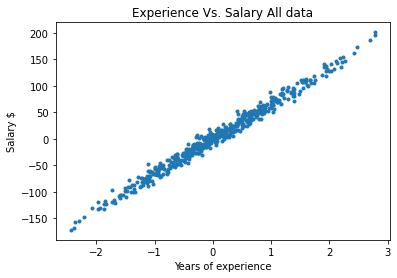

(500, 1)
(500,)


In [416]:
plt.figure()
plt.plot(x,y,'.')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary All data')
plt.show()
print(x.shape)
print(y.shape)

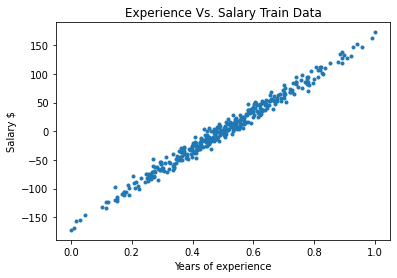

In [417]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)


X_train=x_train
X_test=x_test

scaler = MinMaxScaler()
scaler.fit(x_train)
X_train =scaler.transform(x_train)
X_test  = scaler.transform(x_test)

plt.figure()
plt.plot(X_train,y_train,'.',label='train data')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary Train Data')
plt.show()

In [418]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(100),alpha=100,activation="relu",random_state=1,learning_rate='adaptive', max_iter=2000,solver="lbfgs")
#regr = MLPRegressor(random_state=1, max_iter=500)

regr.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [419]:
#TAREA:
# investigar que es el R^2
# investigar que pasa si los datos no estan normalizados en su entrada "y en su salida."
regr.score(X_test, y_test)

0.9858978498980403

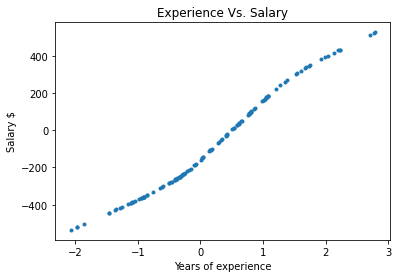

In [420]:
y_test_pred=regr.predict(x_test)
plt.figure()
plt.plot(x_test,y_test_pred,'.',label='Complete data')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary')
plt.show()

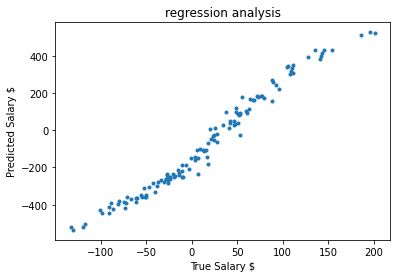

In [421]:
y_test_pred=regr.predict(x_test)
plt.figure()
plt.plot(y_test,y_test_pred,'.')
plt.xlabel('True Salary $')
plt.ylabel('Predicted Salary $')
plt.title('regression analysis')
plt.show()